In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os

path = '/media/newdrive/20180501/ProcessedImages/'
labeled_data = pd.read_csv(path + 'labeled_data.csv')

In [32]:
folders = []
for folder in os.listdir(path):
    if folder[0] in '0123456789':
        folders.append(folder)
folders.sort()
print(folders)        

['104728_cam-np3', '105317_cam-np3', '113610_cam_survey_1', '125355_forcadinho-np3', '132143_forcadinho-np3']


In [33]:
df0 = pd.DataFrame()
df1 = pd.DataFrame()
df2 = pd.DataFrame()
df3 = pd.DataFrame()
df4 = pd.DataFrame()

i = 0

for f in folders:
    datafile = path + f + "/" + f + ".csv"
    if not os.path.exists(datafile):
        print(datafile + "doesn't exist!")
        break
    data = pd.read_csv(datafile, 
                       names=['filename', 'timestamp', 'latitude', 'longitude', 'altitude', 'roll', 'pitch', 'depth', 'entropy', 'date'])[1:]
    data = data.drop(['altitude', 'depth'], axis = 1)
    targetsfile = path + f + "/" + f + "-targets.csv"
    if not os.path.exists(targetsfile):
        print(targetsfile + "doesn't exist!")
        continue
    targets = pd.read_csv(targetsfile,
                          names=['filename', 'date', 'longitude', 'latitude', 'depth', 'EunisCode', 'EunisName', 'level1', 'level2', 'level3', 'level4', 'level5', 'level6', 
                                 'species', 'AphiaID'])[1:]
    targets = targets.drop(['date', 'longitude', 'latitude'], axis=1)
    join_dfs = pd.merge(data, targets, on='filename', how='outer')
    non_empty_targets = join_dfs[join_dfs['EunisCode'].notnull()]
    if i == 0:
        df0 = non_empty_targets
        filenames = df0['filename']
        targets = df0['level3']
        species = pd.get_dummies(df0['species'])
        df0 = df0.drop(['roll', 'pitch', 'level1', 'level2', 'level3', 'level4',
          'level5', 'level6', 'AphiaID', 'EunisName', 'EunisCode', 
          'date', 'timestamp', 'species'], axis = 1)
        df0 = pd.concat([df0, species, targets], axis = 1).groupby('filename').max()
        i += 1
    elif i == 1:
        df1 = non_empty_targets
        filenames = df1['filename']
        targets = df1['level3']
        species = pd.get_dummies(df1['species'])
        df1 = df1.drop(['roll', 'pitch', 'level1', 'level2', 'level3', 'level4',
          'level5', 'level6', 'AphiaID', 'EunisName', 'EunisCode', 
          'date', 'timestamp', 'species'], axis = 1)
        df1 = pd.concat([df1, species, targets], axis = 1).groupby('filename').max()
        i += 1
    elif i == 2:
        df2 = non_empty_targets
        filenames = df2['filename']
        targets = df2['level3']
        species = pd.get_dummies(df2['species'])
        df2 = df2.drop(['roll', 'pitch', 'level1', 'level2', 'level3', 'level4',
          'level5', 'level6', 'AphiaID', 'EunisName', 'EunisCode', 
          'date', 'timestamp', 'species'], axis = 1)
        df2 = pd.concat([df2, species, targets], axis = 1).groupby('filename').max()
        i += 1
    elif i == 3:
        df3 = non_empty_targets
        filenames = df3['filename']
        targets = df3['level3']
        species = pd.get_dummies(df3['species'])
        df3 = df3.drop(['roll', 'pitch', 'level1', 'level2', 'level3', 'level4',
          'level5', 'level6', 'AphiaID', 'EunisName', 'EunisCode', 
          'date', 'timestamp', 'species'], axis = 1)
        df3 = pd.concat([df3, species, targets], axis = 1).groupby('filename').max()
        i += 1
    elif i == 4:
        df4 = non_empty_targets
        filenames = df4['filename']
        targets = df4['level3']
        species = pd.get_dummies(df4['species'])
        df4 = df4.drop(['roll', 'pitch', 'level1', 'level2', 'level3', 'level4',
          'level5', 'level6', 'AphiaID', 'EunisName', 'EunisCode', 
          'date', 'timestamp', 'species'], axis = 1)
        df4 = pd.concat([df4, species, targets], axis = 1).groupby('filename').max()
        i += 1

/media/newdrive/20180501/ProcessedImages/104728_cam-np3/104728_cam-np3-targets.csvdoesn't exist!
/media/newdrive/20180501/ProcessedImages/105317_cam-np3/105317_cam-np3-targets.csvdoesn't exist!
/media/newdrive/20180501/ProcessedImages/113610_cam_survey_1/113610_cam_survey_1-targets.csvdoesn't exist!
/media/newdrive/20180501/ProcessedImages/125355_forcadinho-np3/125355_forcadinho-np3-targets.csvdoesn't exist!
/media/newdrive/20180501/ProcessedImages/132143_forcadinho-np3/132143_forcadinho-np3-targets.csvdoesn't exist!


In [ ]:
df0.level3.value_counts()

In [ ]:
plt.figure(1)

plt.subplot(221)
plt.plot(df1.level3.value_counts())
plt.plot([np.mean(df1.level3.value_counts())]*len(df1.level3.value_counts()), color='red', linestyle = '--')
plt.plot([np.median(df1.level3.value_counts())]*len(df1.level3.value_counts()), color='green')

plt.subplot(222)
plt.plot(df2.level3.value_counts())
plt.plot([np.mean(df2.level3.value_counts())]*len(df2.level3.value_counts()), color='red', linestyle = '--')
plt.plot([np.median(df2.level3.value_counts())]*len(df2.level3.value_counts()), color='green')

plt.subplot(223)
plt.plot(df3.level3.value_counts())
plt.plot([np.mean(df3.level3.value_counts())]*len(df3.level3.value_counts()), color='red', linestyle = '--')
plt.plot([np.median(df3.level3.value_counts())]*len(df3.level3.value_counts()), color='green')

plt.subplot(224)
plt.plot(df4.level3.value_counts())
plt.plot([np.mean(df4.level3.value_counts())]*len(df4.level3.value_counts()), color='red', linestyle = '--')
plt.plot([np.median(df4.level3.value_counts())]*len(df4.level3.value_counts()), color='green')

plt.savefig('classes_per_log.jpg')

fig,ax = plt.subplots()
x = labeled_data.level3.value_counts()
y_mean = [np.mean(x)]*len(x)
y_median = [np.median(x)]*len(x)
print(np.mean(x), np.median(x))
x.bar()
ax.plot(y_mean, color='red', linestyle = '--')
ax.plot(y_median, color='green')

plt.savefig('aggregated_data.jpg')

309.85714285714283 178.0


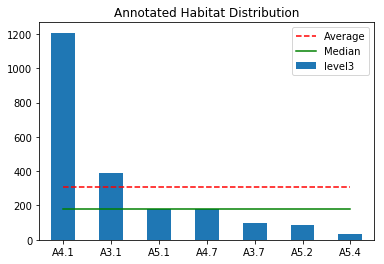

In [35]:
fig,ax = plt.subplots()
x = labeled_data.level3.value_counts()
y_mean = [np.mean(x)]*len(x)
y_median = [np.median(x)]*len(x)
print(np.mean(x), np.median(x))
x.plot.bar(color='C0')
plt.plot(y_mean, color='red', linestyle = '--', label='Average')
plt.plot(y_median, color='green', label='Median')
plt.xticks(rotation='horizontal')
plt.title('Annotated Habitat Distribution')
plt.legend()
plt.savefig('aggregated_data.jpg')

In [36]:
df_a41 = labeled_data[labeled_data['level3'] == 'A4.1']
df_a31 = labeled_data[labeled_data['level3'] == 'A3.1']
df_a51 = labeled_data[labeled_data['level3'] == 'A5.1']
df_a47 = labeled_data[labeled_data['level3'] == 'A4.7']
df_a37 = labeled_data[labeled_data['level3'] == 'A3.7']
df_a52 = labeled_data[labeled_data['level3'] == 'A5.2']
df_a54 = labeled_data[labeled_data['level3'] == 'A5.4']


In [37]:
median = int(np.median(labeled_data.level3.value_counts()))
print('A4.1:',len(df_a41),'\nA3.1:',len(df_a31),'\nA5.1:',len(df_a51),'\nA4.7:',len(df_a47),'\nA3.7:',len(df_a37),
      '\nA5.2:',len(df_a52),'\nA5.4:', len(df_a54), '\nMedian:',median)


A4.1: 1207 
A3.1: 388 
A5.1: 181 
A4.7: 178 
A3.7: 96 
A5.2: 85 
A5.4: 34 
Median: 178


In [38]:
sampled_a41 = df_a41.sample(median // 2)
sampled_a31 = df_a31.sample(median // 2)
sampled_a51 = df_a51.sample(median)
sampled_a47 = df_a47.sample(median // 2)
sampled_a37 = df_a37
sampled_a52 = df_a52
sampled_a54 = df_a54

In [39]:
#sampled_df = pd.concat([sampled_a31,sampled_a37,sampled_a41,sampled_a47,sampled_a51,sampled_a52, sampled_a54])
sampled_df = pd.read_csv('sampled_data.csv')

In [40]:
sampled_df.head()

,filename,timestamp,latitude,longitude,roll,pitch,entropy,date,depth,EunisCode,EunisName,level1,level2,level3,level4,level5,level6,species,AphiaID
0,113610_cam_survey_1_frame1246.jpg,1.525175e+09,41.53323,-8.81036,-3.11,-20.12,21.806570,01/05/18,9.67,A3.1,Atlantic and Mediterranean high energy infrali...,A,A3,A3.1,NaN,NaN,NaN,Paracentrotus,NaN
1,113610_cam_survey_1_frame1272.jpg,1.525175e+09,41.53324,-8.81036,-0.24,-21.64,21.847648,01/05/18,8.34,A3.1,Atlantic and Mediterranean high energy infrali...,A,A3,A3.1,NaN,NaN,NaN,NaN,NaN
2,132143_forcadinho-np3_frame1317.jpg,1.525183e+09,41.53305,-8.80962,-3.47,-22.16,21.671617,01/05/18,9.81,A3.1,Atlantic and Mediterranean high energy infrali...,A,A3,A3.1,NaN,NaN,NaN,Marthasterias glacialis,123803.0
3,113610_cam_survey_1_frame2894.jpg,1.525176e+09,41.53307,-8.80638,0.87,-17.67,21.931659,01/05/18,8.83,A3.11,Kelp with cushion fauna and/or foliose red sea...,A,A3,A3.1,A3.11,NaN,NaN,NaN,NaN
4,113610_cam_survey_1_frame2643.jpg,1.525176e+09,41.53337,-8.80586,-23.16,-19.00,21.929502,01/05/18,9.28,A3.11,Kelp with cushion fauna and/or foliose red sea...,A,A3,A3.1,A3.11,NaN,NaN,NaN,NaN


In [ ]:
plt.bar(sampled_df.level3.replace(['A3.1', 'A4.1'], 'A3.1-A4.1').replace(['A3.7', 'A4.7'], 'A3.7-A4.7'), sampled_df.level3.replace(['A3.1', 'A4.1'], 'A3.1-A4.1').replace(['A3.7', 'A4.7'], 'A3.7-A4.7').value_counts)
#plt.plot([np.mean(sampled_df.level3.value_counts())]*len(sampled_df.level3.value_counts()), color='red', linestyle = '--')
plt.savefig('sampled_data.jpg')
print(np.mean(sampled_df.level3.value_counts()))

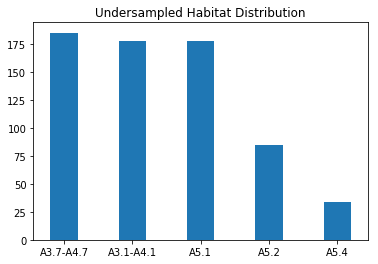

In [42]:
sd_plot = sampled_df.level3.replace(['A3.1', 'A4.1'], 'A3.1-A4.1').replace(['A3.7', 'A4.7'], 'A3.7-A4.7').value_counts().plot.bar(color='C0', width=.4)
plt.title('Undersampled Habitat Distribution')
plt.xticks(rotation='horizontal')
plt.savefig('sampled_data.jpg')

In [43]:
sampled_df = sampled_df.set_index('filename')
sampled_df.head()

,timestamp,latitude,longitude,roll,pitch,entropy,date,depth,EunisCode,EunisName,level1,level2,level3,level4,level5,level6,species,AphiaID
filename,,,,,,,,,,,,,,,,,,
113610_cam_survey_1_frame1246.jpg,1.525175e+09,41.53323,-8.81036,-3.11,-20.12,21.806570,01/05/18,9.67,A3.1,Atlantic and Mediterranean high energy infrali...,A,A3,A3.1,NaN,NaN,NaN,Paracentrotus,NaN
113610_cam_survey_1_frame1272.jpg,1.525175e+09,41.53324,-8.81036,-0.24,-21.64,21.847648,01/05/18,8.34,A3.1,Atlantic and Mediterranean high energy infrali...,A,A3,A3.1,NaN,NaN,NaN,NaN,NaN
132143_forcadinho-np3_frame1317.jpg,1.525183e+09,41.53305,-8.80962,-3.47,-22.16,21.671617,01/05/18,9.81,A3.1,Atlantic and Mediterranean high energy infrali...,A,A3,A3.1,NaN,NaN,NaN,Marthasterias glacialis,123803.0
113610_cam_survey_1_frame2894.jpg,1.525176e+09,41.53307,-8.80638,0.87,-17.67,21.931659,01/05/18,8.83,A3.11,Kelp with cushion fauna and/or foliose red sea...,A,A3,A3.1,A3.11,NaN,NaN,NaN,NaN
113610_cam_survey_1_frame2643.jpg,1.525176e+09,41.53337,-8.80586,-23.16,-19.00,21.929502,01/05/18,9.28,A3.11,Kelp with cushion fauna and/or foliose red sea...,A,A3,A3.1,A3.11,NaN,NaN,NaN,NaN


In [19]:
sampled_df.to_csv('sampled_data.csv')

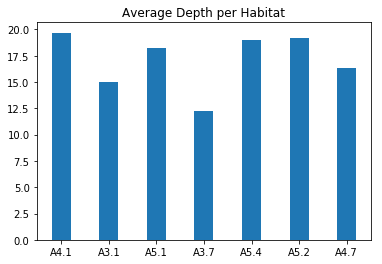

In [44]:
plt.bar(labeled_data.level3, labeled_data.depth.values, width=.4)
plt.title('Average Depth per Habitat')
plt.savefig('eunis_by_depth.jpg')
plt.show()